In [2]:
import ROOT as r
import coffea
import coffea.hist as hist
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np


import awkward as ak
import mplhep

In [6]:
import awkward as ak
events_raw = uproot.open("../HNL/HeavyNeutralLepton_Tree.root")['MuonSystem']
df = coffea.processor.LazyDataFrame(events_raw,entrystop=10)
events = uproot.lazy(df._tree)

In [7]:
events_raw.keys()

['runNum',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'ZCategory',
 'category',
 'npv',
 'npu',
 'weight',
 'higgsPtWeight',
 'higgsPtWeightSys',
 'scaleWeights',
 'lepOverallSF',
 'sf_facScaleUp',
 'sf_facScaleDown',
 'sf_renScaleUp',
 'sf_renScaleDown',
 'sf_facRenScaleUp',
 'sf_facRenScaleDown',
 'metSF',
 'pileupWeight',
 'pileupWeightUp',
 'pileupWeightDown',
 'Flag_HBHENoiseFilter',
 'Flag_BadPFMuonFilter',
 'Flag_HBHEIsoNoiseFilter',
 'Flag_CSCTightHaloFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_goodVertices',
 'Flag_ecalBadCalibFilter',
 'Flag_BadChargedCandidateFilter',
 'Flag_eeBadScFilter',
 'Flag_all',
 'Flag2_HBHENoiseFilter',
 'Flag2_HBHEIsoNoiseFilter',
 'Flag2_BadPFMuonFilter',
 'Flag2_globalSuperTightHalo2016Filter',
 'Flag2_globalTightHalo2016Filter',
 'Flag2_BadChargedCandidateFilter',
 'Flag2_EcalDeadCellTriggerPrimitiveFilter',
 'Flag2_ecalBadCalibFilter',
 'Flag2_eeBadScFilter',
 'Flag2_all',
 'EE_prefiring',
 'rho',
 'met',
 'metNoMu',
 'metPhi',


In [15]:
cphi = events.cscRechitCluster3Phi
lphi = events.lepPhi

In [21]:
cphi.delta_phi(lphi)

AttributeError: no field named 'delta_phi'

(https://github.com/scikit-hep/awkward-1.0/blob/1.1.2/src/awkward/highlevel.py#L1127)

In [32]:
def makehist(branch,nbin=50):
    data = branch.array()
    name = branch.name
    histo = hist.Hist("Counts",
                      hist.Bin(name,"",nbin, min(data), max(data)),
                     )
    histo.fill(**{name:data})
    return histo

def plotBranches(branches,nbins=10,range=None,density=None):
    fig, ax = plt.subplots(figsize=(8,6))
    
    for b in branches:
        h = makehist(b,nbins)
        hist.plot1d(h,ax=ax,clear=False)
    ax.legend([b.name for b in branches])
    plt.tight_layout()
    plt.show()
    return
    
def plotBranch(b,nbins=10,range=None,density=None,logY=False):

    h = makehist(b,nbins)
    fig, ax = plt.subplots(figsize=(8,6))
    if logY:
        ax.set_yscale('log')    
    hist.plot1d(h,ax=ax,clear=False)
#    ax.legend(b.name)    
    ax.set_xlabel(b.name)
    plt.tight_layout()
    plt.show()
    
def plotArray(arr,label,nbins=10,range=None,density=None):
    h,bins = np.histogram(arr,bins=nbins,range=range,density=density)

    fig, ax = plt.subplots(figsize=(8,6))
    hep.histplot(h, bins,edges=True,ax=ax)
    ax.set_xlabel(label)
    plt.tight_layout()
    plt.show()

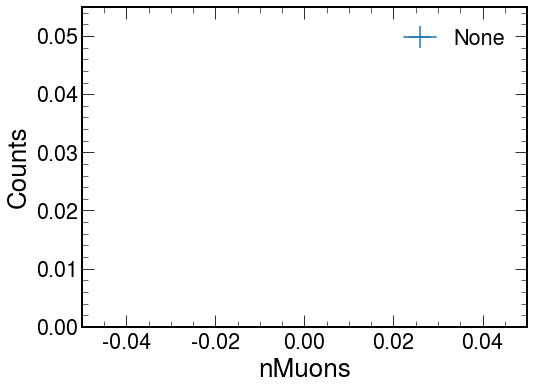

In [33]:
plotBranch(events['nMuons'])

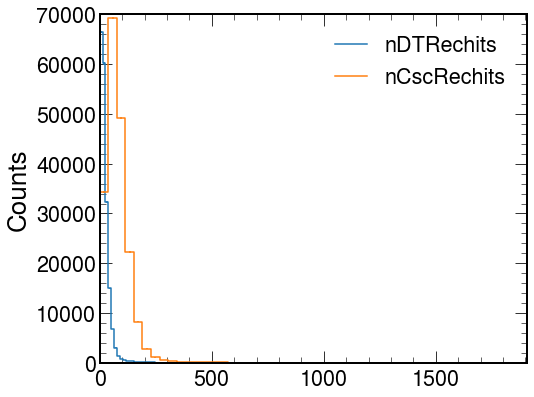

In [14]:
plotBranches([events['nDTRechits'],
              events['nCscRechits'],
             ],50,(0,400))

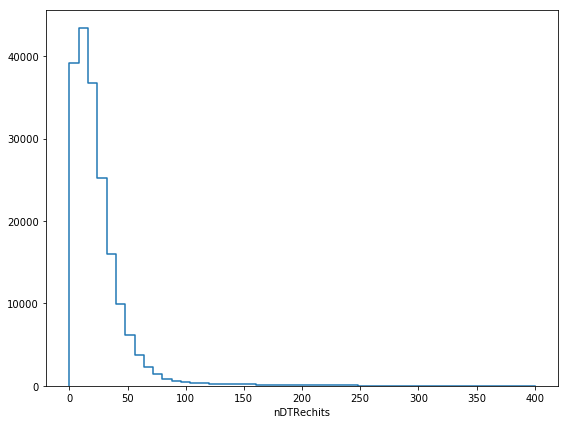

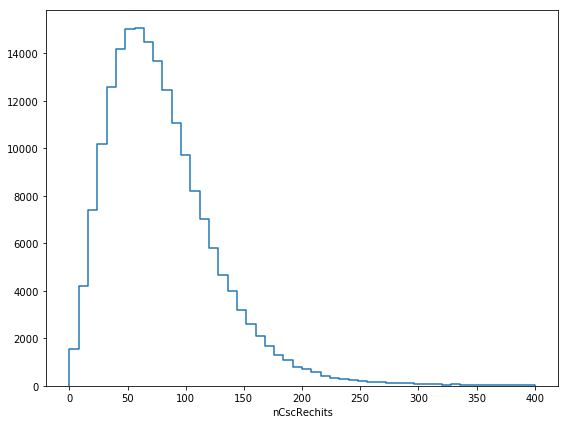

In [155]:
plotBranch(events['nDTRechits'],50,(0,400))
plotBranch(events['nCscRechits'],50,(0,400))

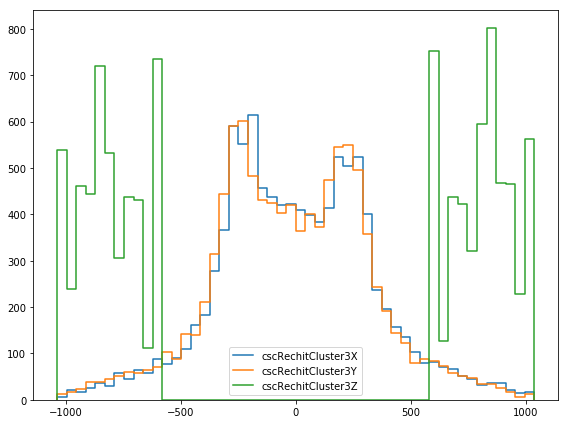

In [136]:
plotBranches([events['cscRechitCluster3X'],
              events['cscRechitCluster3Y'],
               events['cscRechitCluster3Z'],
             ],50)

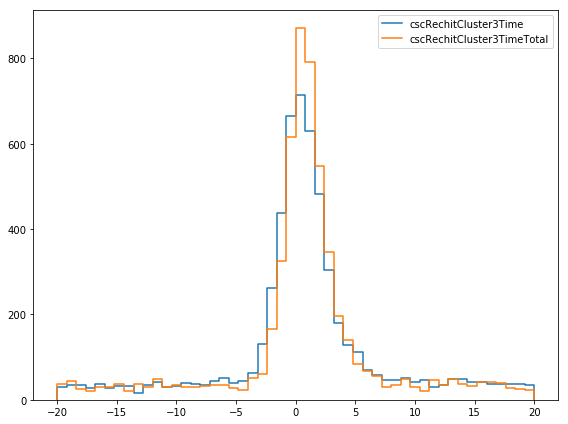

In [150]:
plotBranches([events['cscRechitCluster3Time'],
               events['cscRechitCluster3TimeTotal'],
             ],50,(-20,20))

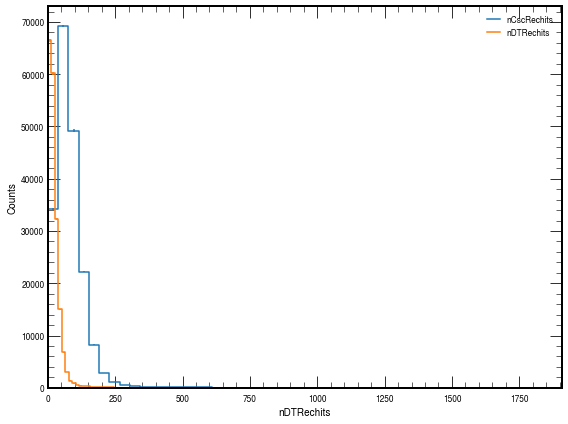

In [26]:
plotBranches([
    events['nCscRechits'],
    events['nDTRechits'],
],50)

In [131]:
events['cscRechitCluster3Time'].array()[1]

<Array [] type='0 * float32'>

In [13]:
import awkward as ak
a =np.array([[0,1],[0,0],[1,1]])
(ak.any(a,axis=1))

<Array [True, False, True] type='3 * bool'>

In [27]:
df = events.arrays(filter_name="gLLP_*",library="pd")

In [20]:
llp = events.arrays('gLLP_csc',)

In [26]:
ak.any(llp,axis=1)

<Record ... False, False, False, False]} type='{"gLLP_csc": var * bool}'>

In [15]:
matched = events.cscRechitCluster3_match_gLLP

In [16]:
eta = events.cscRechitCluster3Eta

In [23]:
ak.sum(eta)

462.7577

In [22]:
ak.sum(eta[matched])

196.24107

In [26]:
eta[ak.any(eta,axis=1)]

<Array [[1.57], [-1.39], ... [1.47], [1.33]] type='9860 * var * float32'>

In [103]:
events_raw = uproot.open("../displacedJetMuon_ntupler_9.root")['ntuples/llp']
df = coffea.processor.LazyDataFrame(events_raw,entrystop=10)
events = uproot.lazy(df._tree)

In [117]:
eta,phi = events.cscRechitsEta, events.cscRechitsPhi
X = ak.zip({
    "eta":eta,
    "phi":phi
})


In [16]:
# events = uproot.open("../displacedJetMuon_ntupler_9.root")['ntuples/llp']
# df = coffea.processor.LazyDataFrame(events_raw,entrystop=10)
# events = uproot.lazy(df._tree)

In [15]:
events_raw.keys()

['isData',
 'nPV',
 'runNum',
 'nSlimmedSecondV',
 'lumiNum',
 'eventNum',
 'eventTime',
 'pvX',
 'pvY',
 'pvZ',
 'fixedGridRhoAll',
 'fixedGridRhoFastjetAll',
 'fixedGridRhoFastjetAllCalo',
 'fixedGridRhoFastjetCentralCalo',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'fixedGridRhoFastjetCentralNeutral',
 'nPVAll',
 'pvAllX',
 'pvAllY',
 'pvAllZ',
 'pvAllLogSumPtSq',
 'pvAllSumPx',
 'pvAllSumPy',
 'nBunchXing',
 'BunchXing',
 'nPU',
 'nPUmean',
 'nMuons',
 'muonE',
 'muonPt',
 'muonEta',
 'muonPhi',
 'muonCharge',
 'muonIsLoose',
 'muonIsMedium',
 'muonIsTight',
 'muon_d0',
 'muon_dZ',
 'muon_ip3d',
 'muon_ip3dSignificance',
 'muonType',
 'muonQuality',
 'muon_pileupIso',
 'muon_chargedIso',
 'muon_photonIso',
 'muon_neutralHadIso',
 'muon_ptrel',
 'muon_chargedMiniIso',
 'muon_photonAndNeutralHadronMiniIso',
 'muon_chargedPileupMiniIso',
 'muon_activityMiniIsoAnnulus',
 'muon_passSingleMuTagFilter',
 'muon_passHLTFilter',
 'muon_validFractionTrackerHits',
 'muon_isGlobal',
 'muon_no

In [19]:
df = events.arrays(filter_name="cscRechits*",library="pd")

In [30]:
from sklearn.cluster import DBSCAN

In [95]:
nCore=50
eps = 0.2
nCS = []
for i in range(500):
    eta,phi = df['cscRechitsEta'][i],df['cscRechitsPhi'][i]
    X = np.array(list(zip(eta,phi)))
    db = DBSCAN(eps=eps, min_samples=nCore).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    nCS.append(n_clusters_)

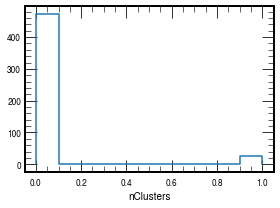

In [96]:
h,bins =np.histogram(nCS)

fig, ax = plt.subplots(figsize=(4,3))
hep.histplot(h, bins,edges=True,ax=ax)
ax.set_xlabel('nClusters')
plt.tight_layout()
plt.show()

Total number of rechits: 43
Estimated number of clusters: 2
Estimated number of noise points: 14


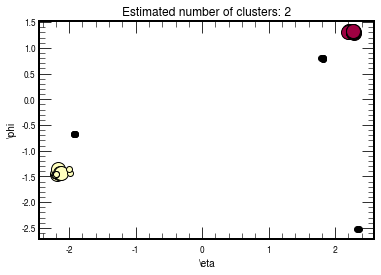

In [73]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Total number of rechits: %d"%len(X))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    plt.xlabel('\eta')
    plt.ylabel('\phi')    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()